# Exploratory Data Analysis
## Machine Learning 1
### `! git clone https://github.com/DS3001/EDA`

## Exploratory Data Analysis
- Once the data are cleaned up, we'll want to do some basic summaries and visualizations to understand their basic properties and whether they are clean enough to proceed, and this is called **Exploratory Data Analysis**
- This can be an exhausting process, and there is no uniquely correct way to do it: choices have consequences
- Some people divide the wrangling and EDA and analysis much more than I do: I think everything is in service of the analysis that will ultimately be done, and you can't meaningfully do any of this in isolation --- but we'll learn some useful general skills
- Since we are doing EDA and not Visualization, the emphasis is on *useful* graphs, not necessarily *pretty* ones
- We will stay inside Pandas, and introduce PyPlot and Seaborn in the next lecture
- Last time, we cleaned the pretrial data, which works well for visualizations: There are many interesting numeric variables, categorical variables, and dummy variables. We'll use it again today.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # Pandas automatically uses some pyplot functions, so we need it loaded

df = pd.read_csv('./data/pretrial_data.csv') # Local file
#df = pd.read_csv('./EDA/data/pretrial_data.csv') # On Colab
print(df.head(),'\n')
print(df.describe(),'\n')

   Unnamed: 0 case_type   age sex race  is_poor  bond  bond_type  prior_F  \
0           0         F  31.0   M    W      NaN   NaN          7      0.0   
1           1         F  60.0   M    B      NaN   NaN          7     13.0   
2           2         M  27.0   M    W      NaN   NaN          7      0.0   
3           3         M  27.0   M    B      0.0   NaN          7      0.0   
4           4         F  28.0   F    W      0.0   NaN          7      0.0   

   prior_M  gini  released  sentence_type   sentence  bond_NA  held_wo_bail  \
0      0.0  0.44       NaN            NaN        NaN     True         False   
1     21.0  0.44       0.0            0.0  60.000000     True         False   
2      0.0  0.44       0.0            1.0  12.000000     True         False   
3      9.0  0.44       0.0            1.0   0.985626     True         False   
4      0.0  0.44       1.0            4.0   0.000000     True         False   

   sentence_NA  
0         True  
1        False  
2        Fa

## Histograms
- A *histogram* is a fundamental and powerful tool for visualizing numeric data:
  - Take the minimum and maximum values the variable takes, and divide the range into $B$ equally spaced *bins*. For example, if the min is 0 and the max is 100 and $B=4$, the bins are $\{ [0,25), [25,50), [50,75), [75,100] \}$.
  - For each bin, you count the number of observations that fall into that bin
  - Plot the result as a bar graph, where the count in the bin equals the height of the bar
- At this stage, picking the number of `bins=B` is a matter of "taste"
- Let's histogram the Gini coefficient to see an example

<Axes: >

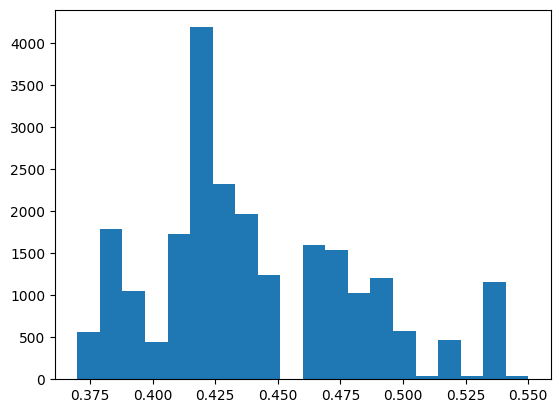

In [2]:
df['gini'].hist(bins=20,grid=False) # Here is a pretty good looking histogram

## Histograms [Math]
- The formal definition of a histogram is that it is a function, such that the *height* of bar $k$ is:
$$
h_k =  \sum_{i=1}^N \mathbb{I}\left\lbrace b_{k-1} < x_i \le b_k \right\rbrace, \quad k = 1, ..., B
$$
where $\mathbb{I}\{...\}$ equals 1 when the statement inside is true, and zero otherwise.
- When *normalized* by $N$, you can interpret this as the probability that a random draw of $X$ falls into the $k$-th bin, between $b_{k-1}$ and $b_k$
- The alternative definition of a histogram is in terms of the *window size*, $w$, given by
$$
\hat{f}_w(x) = \dfrac{1}{N} \sum_{i=1}^N \dfrac{\mathbb{I}\{x-w < x_i \le x+w \}}{2w}
$$
which explicitly estimates the probability density function $f$ and has superior asymptotic statistical properties as $w \rightarrow 0$
- Picking the number of bins or window size is basically a sub-field of statistics; the best answers are typically based on cross-validation


<Axes: >

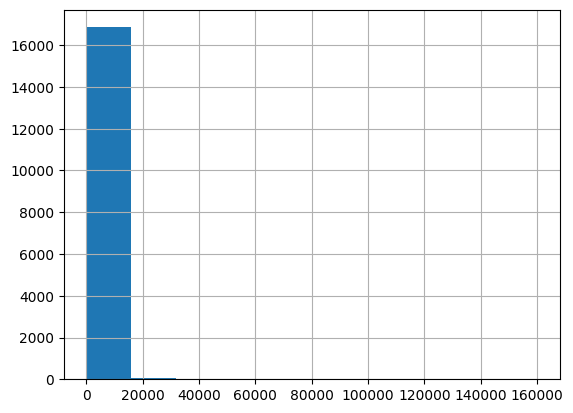

In [3]:
df['bond'].hist() # This is not a very useful histogram...

## Variables with "Long Tails"
- That looks bad, just unuseful and misleading at best
- We often get graphs that are not meaningful to us because their values are **badly scaled**
- Computers, likewise, dislike variables with bad scaling: stable calculations become challenging when comparing numbers of very different magnitudes
- The traditional way to smooth them is to use the **(natural) logarithm** or `log()` function: This converts multiplication/division to addition/subtraction, or levels to growth rates, and shrinks large values significantly
- `log()` is only defined as a real number for for strictly positive numbers, so it forces us to drop zeros and negative numbers from visualizations or analysis: This is highly undesirable
- The **inverse hyperbolic sine** function, `arcsinh()`, is defined for any number, positive or negative, and has almost the same interpretation, so we often use it instead

C:\Users\teren\AppData\Roaming\Python\Python310\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: >

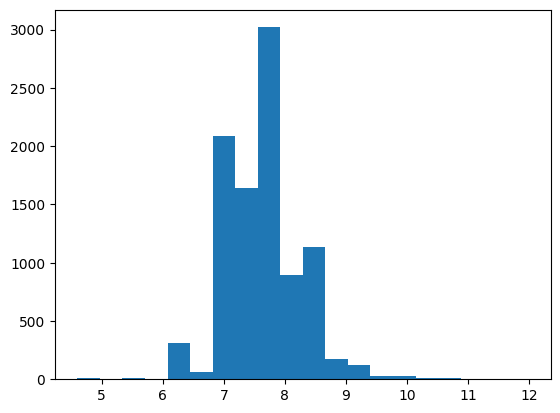

In [4]:
df['bond_log'] = np.log(df['bond'])
# df['bond_log'].hist() # This crashes: We need to locate the non-infinte values
df.loc[df['bond_log']>0,'bond_log'].hist(bins=20,grid=False)

<Axes: >

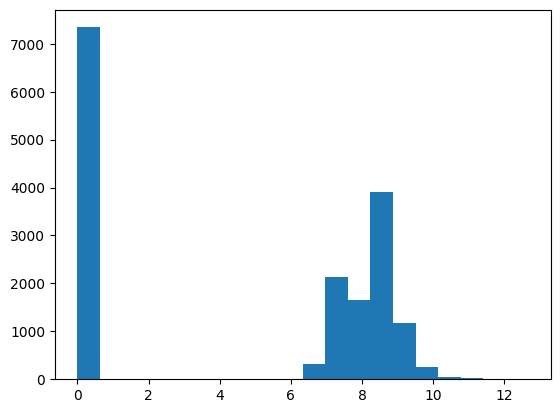

In [5]:
df['bond_arcsinh'] = np.arcsinh(df['bond'])
df['bond_arcsinh'].hist(bins=20,grid=False) # Notice all the data at zero that log throws away

## `log()` versus `arcsinh()` [Math]
- The derivative of natural log is $1/x$, while for inverse hyperbolic sine it is $1/\sqrt{1+x^2}$, which are so close as to render the difference negligible for our purposes
- We won't go over it now, but it's typically easy to go back and forth between the transformed analysis and the original values in levels, so using the transformations are not a problem in analysis
- Since `arcsinh(0)=0` but `log` tends to negative infinity at zero and their derivatives are similar, the `arcsinh` curve lies above the `log` curve

C:\Users\teren\AppData\Local\Temp\ipykernel_368\2551805020.py:3: RuntimeWarning: invalid value encountered in log
  y1 = np.log(x)


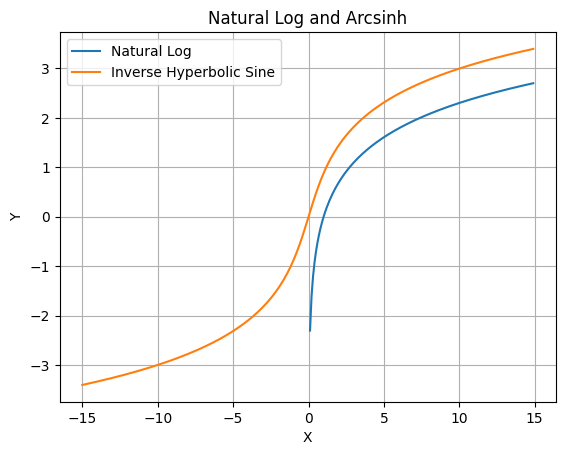

In [6]:
# Quick matplotlib plot of log and arcsinh:
x = np.arange(-15,15,.1)
y1 = np.log(x)
y2 = np.arcsinh(x)
plt.plot(x,y1, label ='Natural Log')
plt.plot(x,y2, label='Inverse Hyperbolic Sine')
plt.xlabel("X")
plt.ylabel("Y")
plt.grid()
plt.legend(loc='upper left')
plt.title('Natural Log and Arcsinh')
plt.show()

## Exercises (Histograms)
- Plot a histogram of the `sentence` variable. Is it badly scaled?
- Use the `log()` and `arcsinh()` transformations on `sentence` and create histograms. Compare the outcomes.
- What would happen if you threw away the zeros when analyzing sentencing? How might it bias or otherwise interfere with your analysis?

## Statistics
- Our subsequent plots will involve a bit more statistical computation, so we'll pause and talk about some statistics concepts
- A **(sample) statistic** is a function of the data: We take a list of values, and aggregate it into a summary number(s) that helps us better understand the phenomenon we're interested in
- An example is the **mean** or **average**: We sum all of the values, and divide by the total number of values. If we have $N$ observations and the values are $(x_1, x_2, ..., x_N)$, the average is
$$
\bar{x} = \dfrac{x_1+x_2+...+x_N}{N} = \dfrac{ \sum_{i=1}^N x_i }{N}
$$
The intuition is, "Imagine you drew a number out of the hat. They're all drawn with equal probability. What kind of number do you expect to get?"
- The field of statistics, roughly, studies the behavior of sample statistics as the sample size $N$ gets large: What is the behavior of a sample statistic as we get lots of data? Does it approach the "true" value, if one exists?
- In EDA, we're typically using statistics as a way to summarize the data and understand its features, and not necessarily imputing a "deeper meaning" to them

## Always, always, always, look at your data
![Lawyer Salaries](https://github.com/DS3001/EDA/blob/main/lawyerSalaries2018.jpg?raw=1)
- How *useful* is it to say, "The average yearly salary of a lawyer is about $100k?"
- Statistics can be incredibly misleading

## Statistics: Measures of Central Tendency
- These statistics correspond to values around which the data are concentrated:
    - Mode: The most frequently occuring value in the data
    - Median: The value(s) at which half the population is above and half the population is below
    - Mean: The numeric average value of the data,
$$
\bar{x} = \dfrac{x_1+x_2+...+x_N}{N} = \dfrac{ \sum_{i=1}^N x_i }{N}
$$

Mean:  0.4406351210168901
Median:  0.43
Mode:  0    0.42
Name: gini, dtype: float64


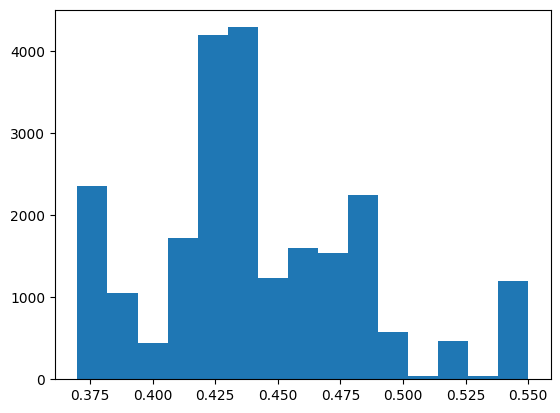

In [7]:
var = 'gini'

df[var].hist(bins=15,grid=False)
print('Mean: ', df[var].mean() )
print('Median: ', df[var].median() )
print('Mode: ', df[var].mode() )

Mean:  4.686972979300787
Median:  7.600902709541988
Mode:  0    0.0
Name: bond_arcsinh, dtype: float64


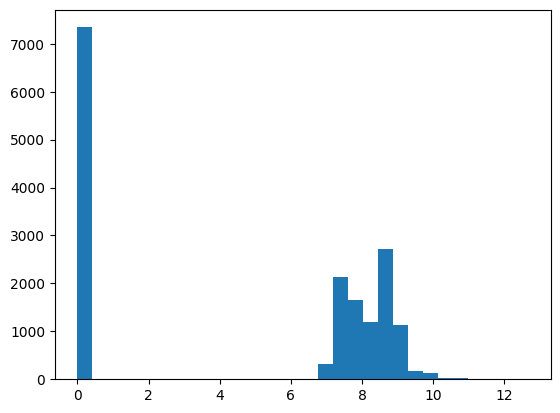

In [8]:
df['bond_arcsinh'] = np.arcsinh(df['bond'])

var = 'bond_arcsinh'
df[var].hist(bins=30,grid=False)
print('Mean: ', df[var].mean() ) # Does anyone actually get 4.68697?
print('Median: ', df[var].median() )
print('Mode: ', df[var].mode() )

## Statistics: Measures of Rank
- Imagine lining the data up by magnitude, from smallest to largest
- The **p-th percentile** is the value for which $p\%$ of the population is below $p$'s value and $(1-p)\%$ of the population is above $p$'s value
- If you use decimals instead of percents, like $.05$ for $5\%$ or $.50$ for $50\%$, the word **quantile** is typically used
- This ranks observations from smallest to largest by the proportion of the sample it "defeats"
- Why? Quantiles and the median are robust to outliers: Moving extremely large or small values won't affect the median or significantly change the rankings.

Minimum:  0.37
0th quantile:  0.37
.05 quantile:  0.38
.10 quantile:  0.38
.25 quantile:  0.42
.50 quantile:  0.43
.75 quantile:  0.47
.90 quantile:  0.5
.95 quantile:  0.54
1.00 quantile:  0.55
Sample Maximum: 0.55


<Axes: xlabel='gini'>

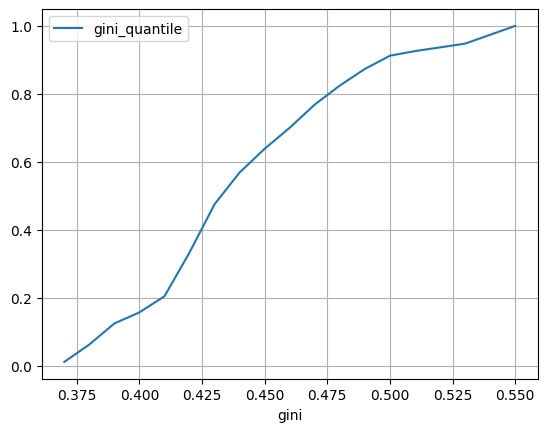

In [9]:
# Sample quantiles for the gini variable:
var = 'gini'
print('Minimum: ', df[var].min())
print('0th quantile: ', df[var].quantile(0))
print('.05 quantile: ', df[var].quantile(.05))
print('.10 quantile: ', df[var].quantile(.10))
print('.25 quantile: ', df[var].quantile(.25))
print('.50 quantile: ',df[var].quantile(.50))
print('.75 quantile: ',df[var].quantile(.75))
print('.90 quantile: ',df[var].quantile(.90))
print('.95 quantile: ',df[var].quantile(.95))
print('1.00 quantile: ',df[var].quantile(1))
print('Sample Maximum:', df[var].max())

# A quick Empirical Distribution Function plot:
df['gini_quantile'] = df['gini'].rank(method = 'average', pct = True) # Ranks the values
df.sort_values('gini').plot(x = 'gini', y = 'gini_quantile', grid = True)


Minimum:  0.0
0th quantile:  0.0
.05 quantile:  0.0
.10 quantile:  0.0
.25 quantile:  0.0
.50 quantile:  1000.0
.75 quantile:  2500.0
.90 quantile:  3500.0
.95 quantile:  5000.0
1.00 quantile:  160000.0
Sample Maximum: 160000.0


<Axes: xlabel='bond'>

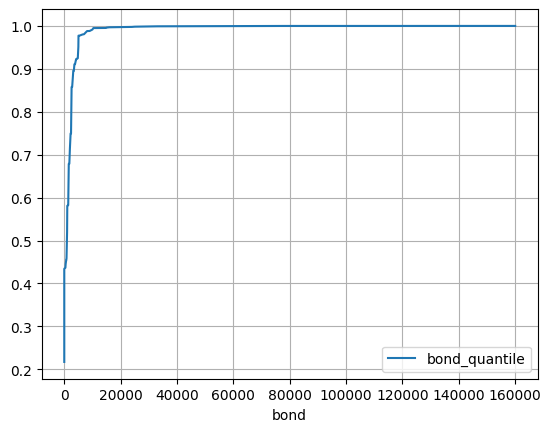

In [10]:
# Sample quantiles for the bond variable:
var = 'bond'
print('Minimum: ', df[var].min())
print('0th quantile: ', df[var].quantile(0))
print('.05 quantile: ', df[var].quantile(.05))
print('.10 quantile: ', df[var].quantile(.10))
print('.25 quantile: ', df[var].quantile(.25))
print('.50 quantile: ',df[var].quantile(.50))
print('.75 quantile: ',df[var].quantile(.75))
print('.90 quantile: ',df[var].quantile(.90))
print('.95 quantile: ',df[var].quantile(.95))
print('1.00 quantile: ',df[var].quantile(1))
print('Sample Maximum:', df[var].max())

# A quick Empirical Distribution Function plot:
df['bond_quantile'] = df['bond'].rank(method = 'average', pct = True) # Ranks the values
df.sort_values('bond').plot(x = 'bond', y = 'bond_quantile', grid = True)


## Statistics: Measures of Dispersion
- Measures of dispersion describe how "spread out" the data are:
    - Range: The minimum and maximum values of the data
    - Interquartile Range: The distance between the 25%-quantile and 75%-quantile, which includes the middle half of the data
    - Variance: The average squared distance from the mean,
$$
s^2 = \dfrac{(x_1-\bar{x})^2 + (x_2 + \bar{x})^2 + ... + (x_N - \bar{x})^2}{N-1} = \dfrac{\sum_{i=1}^N (x_i-\bar{x})^2 }{N-1}
$$
So take the value of each observation $i$, subtract off the mean $\bar{x}$, square that, and then divide by $N-1$. If the data are all clustered around $\bar{x}$, this will be small, but if the data are very spread out, this will be larger.
    - Standard Deviation: The square root of the variance,
$$
s = \sqrt{s^2} = \sqrt{ \dfrac{\sum_{i=1}^N (x_i-\bar{x})^2 }{N-1} }
$$
- ...why? The standard deviation is in the same units as the original variable, but the variance is approximately an average. They end up having have different statistical properties in small samples. Some models are more naturally parameterized in terms of the variance rather than the standard deviation.

## Boxplots
- The rank and dispersion information is useful to illustrate in a plot, since it can feel somewhat abstract compared to a histogram
- A **boxplot** is roughly a visualization of the 5-number summary:
    - The green bar is the median/50%-quantile
    - The "box" represents the interquartile range (IQR): The range of values containing everything from the 25%-quantile to the 75%-quantile
    - The "whiskers" include a range of values from the first quartile minus $\frac{3}{2}IQR$ to the third quartile plus $\frac{3}{2}IQR$
    - Values outside the whiskers are typically considered **outliers**
- This plot is intended to illustrate the rank information in a useful way

<Axes: >

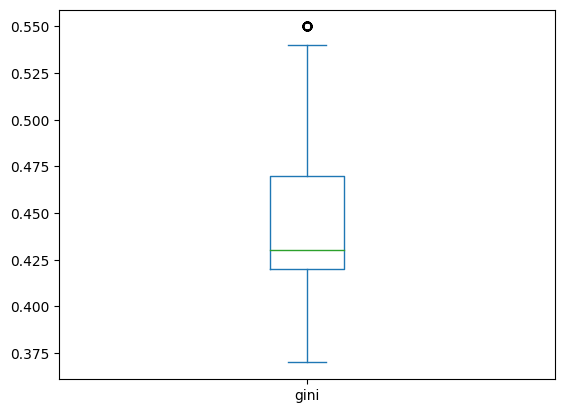

In [11]:
#df.boxplot(column = 'gini')
df['gini'].plot.box()

<Axes: >

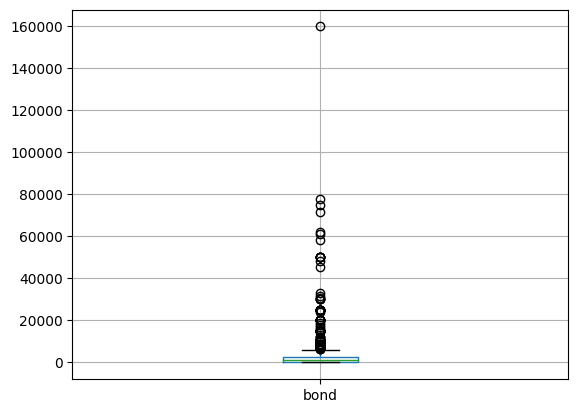

In [12]:
df.boxplot(column = 'bond')

<Axes: >

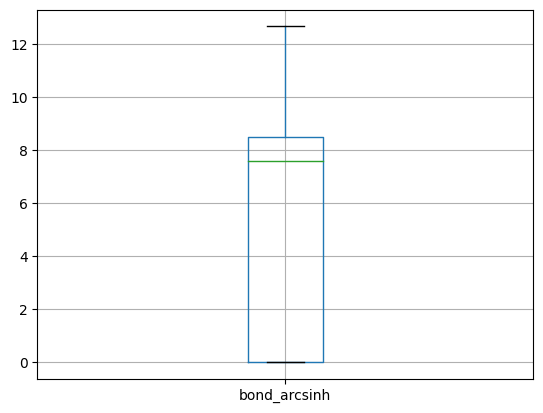

In [13]:
df.boxplot(column = 'bond_arcsinh')

## Variable Descriptions
- This is a bunch of ways of slicing the data, and there are many, many more
- Many stats packages report a five-number+ summary: The minimum, the 25%/median/75% percentiles, the maximum, the mean and standard deviation, and how many non-missing observations are recorded (count)
- In Pandas, you can do this with `df[var].describe()`
- From `.describe()`, you can quickly compute almost all the statistics we've mentioned
- The `count` value is the number of non-missing entries

In [14]:
descr = df['age'].describe() # Save the description as an object
print(descr,'\n')

# Computing the Variance:
std = descr[2] # Accessing the standard deviation from the description object
var = std**2
print('Variance: ', var,'\n')

# Computing the IQR:
thirdQ = descr[6] # Getting the 75% percentile
firstQ = descr[4] # Getting the 25% percentile
IQR = thirdQ - firstQ # Computing the IQR
print('IQR: ', IQR)

count    22930.000000
mean        34.278020
std         12.466248
min         18.000000
25%         24.000000
50%         31.000000
75%         42.000000
max        100.000000
Name: age, dtype: float64 

Variance:  155.4073279301658 

IQR:  18.0


## What do you do with outliers?
- Maybe nothing: They're part of the data. Maybe you trim the outliers and drop them, or **windsorize** and replace them with a high or low value.
- The outliers will typically exert *leverage* on the analysis: extreme values will influence the outcomes of your estimates or algorithm (e.g. they disproportionately affect the variance)
- But if the outliers are "really part of the data," that leverage can be totally legitimate
- What you want to be certain of is that the outliers are actually representative of the population of interest --- some observations might have characteristics that make them uncharacteristic of the data you expect to see in the future, and your models will be less useful if they are trained on those data
- The field of *robust statistics* is generally concerned with estimating models when the presence of outliers is likely to interfere with the results

## Exercises (Statistics and Boxplots)
- Generate a description of the `sentence` variable. What is the sample mean and sample standard deviation?
- What are the mean, median, and mode of the `sentence` variable? What is the variance? The IQR?
- Make a boxplot. Are there a lot of outliers? Explain.
- Create an `outlier` dummy for the bond variable that indicates an observation is more than $1.5 \times IQR$ away from the $IQR$. (There are many ways to do this, some easier than others.). What proportion of the observations are outliers?

## Scatter Plots
- Just like cross-tabs allow you to think about two variables at once, scatter plots provide a way of looking at the association between two variables in the data set
- What's a scatterplot? Pick two variables, $x$ and $y$. For each pair of values $(x_i, y_i)$ for observation $i$, you make a dot. Plot all the dots for all observations, $i=1,...,N$.
- The goal is typically to uncover patterns of association between the two variables

<Axes: xlabel='prior_F', ylabel='prior_M'>

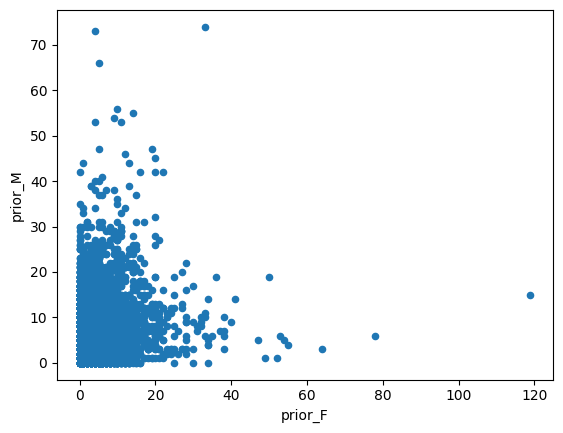

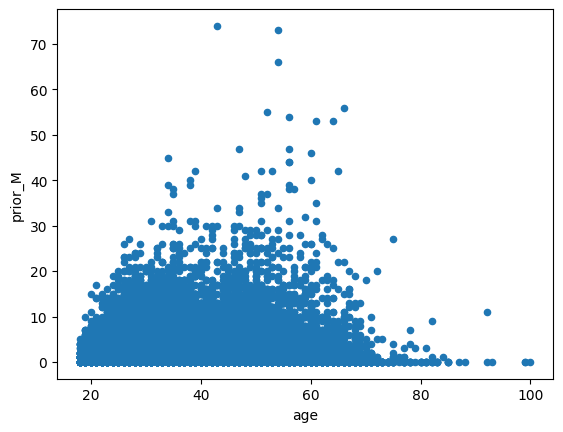

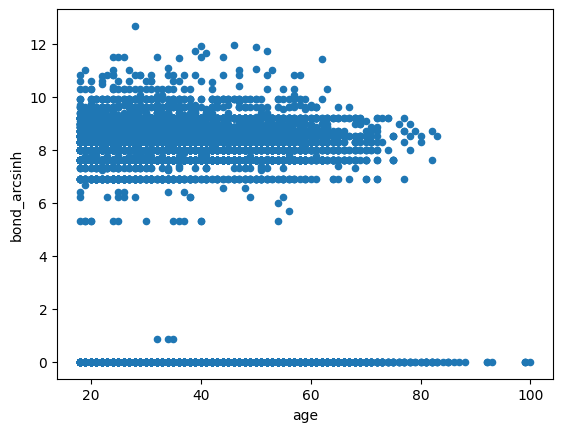

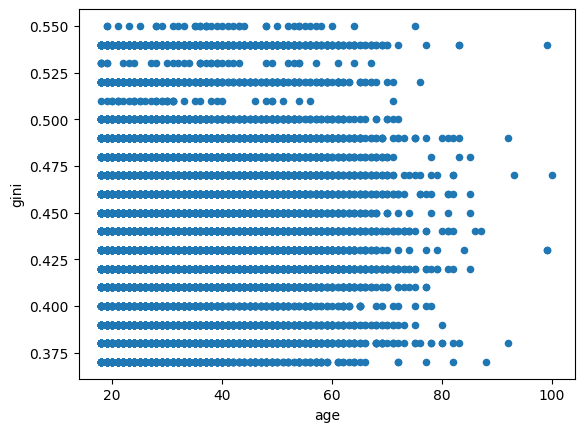

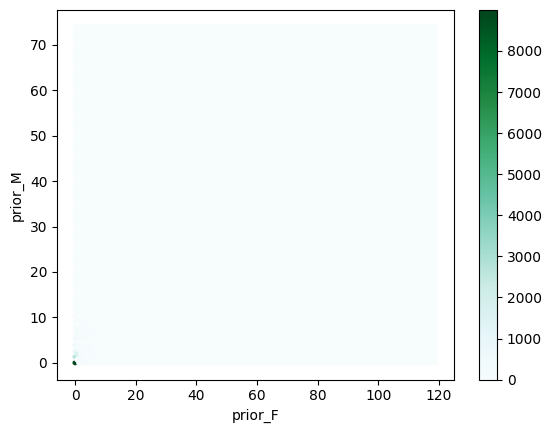

In [15]:
df.plot.scatter(y='prior_M',x='prior_F')
df.plot.scatter(y='prior_M',x='age')
df.plot.scatter(y='bond_arcsinh',x='age')
df.plot.scatter(y='gini',x='age')

df.plot.hexbin(y='prior_M',x='prior_F')

## Statistics: Measures of Association
- Covariance: Essentially, the common variance between two variables
$$
\text{cov}(x,y) = \dfrac{(x_1-\bar{x})(y_1-\bar{y}) + (x_2-\bar{x})(y_2-\bar{y})+...+(x_N-\bar{x})(y_N-\bar{y}) }{N-1} = \dfrac{\sum_{i=1}^{N} (x_i-\bar{x})(y_i-\bar{y}) }{N-1}
$$
Notice how $\text{cov}(x,x) = s^2$.
- Look at each pair $x_i$ and $y_i$. If they tend to both be above or below their averages, then there is positive covariance. If one tends to be above its average when the other is below, then there is negative covariance.
- Correlation: The covariance normalized by the
$$
r_{x,y} = \dfrac{\text{cov}(x,y)}{ s_x s_y}
$$
This is helpful because it is between zero and 1, with 1 being perfect positive correlation, -1 being perfect negative correlation, and 0 being no correlation at all

## Covariance and Correlation Matrices
- The function `df.cov()` will compute all of the variances and covariances for everything in your dataframe, and `df.corr()` will compute the correlations
- The output will be a matrix: The variances of the variables will be on the diagonal, and the covariances/correlations will be the off-diagonal terms
- You probably want to use `df.loc[:,list]` to restrict attention to a set of variables in `list`, rather than compute all the possible covariances/correlations

In [16]:
vars = ['prior_M','prior_F']

VCV = df.loc[:,vars].cov() # Compute the variance-covariance matrix for vars
print(VCV,'\n')

cor = df.loc[:,vars].corr() # Compute the correlation matrix for vars
print(cor)

           prior_M    prior_F
prior_M  19.700497   6.580946
prior_F   6.580946  12.178719 

          prior_M   prior_F
prior_M  1.000000  0.424863
prior_F  0.424863  1.000000


## Exercises (Scatter Plots and Covariance)
- Plot a scatterplot of the `sentence` and `bond` variables. What do you see?
- Try a scatterplot of the inverse hyperbolic sine of `sentence` and `bond`.
- What are the covariance and correlation matrices between `sentence` and `bond`?
- Do you see a strong connection between these variables in the data? Should there be?

## Grouping
- We very often want to **condition** or **group** our sample statistics and plots on specific categorical variables: For example, the bond or sentence conditional on race or sex
- This provides valuable context for what the numbers mean
- A lot of our tools immediately become more powerful when we can quantitatively differentiate between different categorical cases

## Kernel Density Plots
- A downside of histograms is that plotting multiple variables on the same plot at the same time often becomes a jumbled mess: Do you stack them? Jitter them?
- The alternative is to use a smoothed line to represent each variable; this is called a **kernel density plot**
- The intuition of a kernel density plot is that each data point gets its own little bell curve, centered at its value. All the bell curves are averaged together.
- So if data are bunched closely, their bell curves sum to a large value. If the data are sparse around some values, the sem is small
- This renders the jagged histogram into a smooth plot

<Axes: ylabel='Density'>

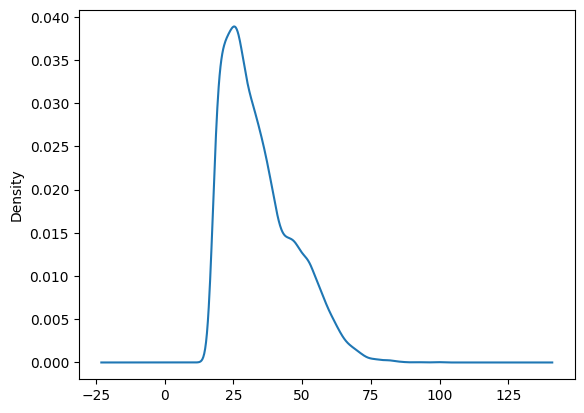

In [17]:
var = 'age'
df[var].plot.density() # The kernel density plot for age

<Axes: ylabel='Frequency'>

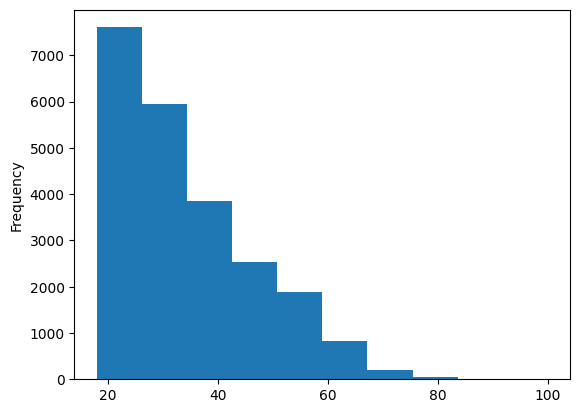

In [18]:
df[var].plot.hist() # The histogram version

## Kernel Density Plots
- The upside is that it's easy to visualize many series at once, grouped by a categorical variable, and the choice of "bins" isn't as arbitrary (there are a lot of good ways to pick the **bandwidth**)
- The downside is that if the data have big spikes, the kernel density plot struggles to represent that faithfully, because it is trying to smooth everything out

<Axes: ylabel='Density'>

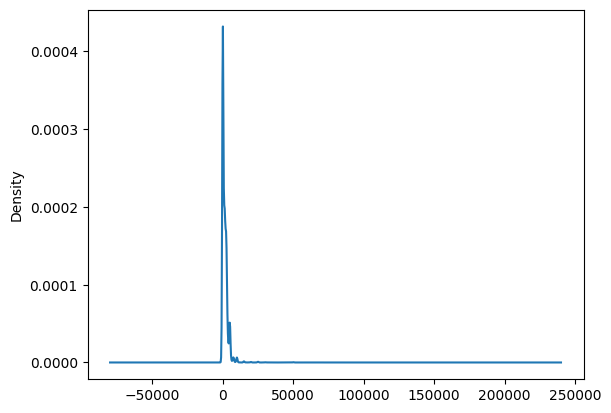

In [19]:
var = 'bond'
df[var].plot.density() # Not so good for bond

<Axes: ylabel='Density'>

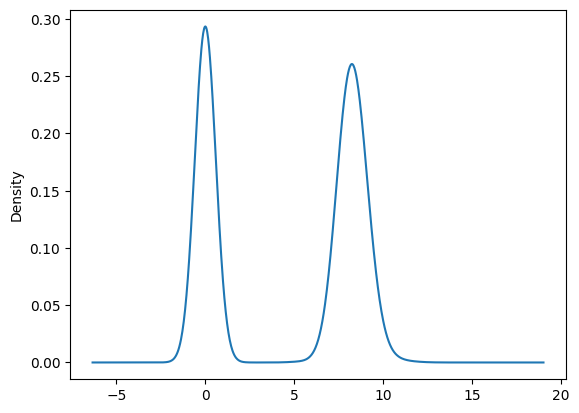

In [20]:
var = 'bond_arcsinh'
df[var].plot.density() # That looks pretty bad

## Pivot Tables and Grouped Density Plots
- To make very useful plots to compare the same variable for different groups, you have to do two steps:
    1. Make a **pivot table** of values, using `df_wide = df.pivot(columns=group,values=var)` where `group_by` is the categorical variable to condition on, and `var` is the variable to plot. This is often called a "wide" dataframe because it explodes values by columns.
    2. Call the `.plot.density()` method on the `df_wide` dataframe you built in step 1
- The result is a kernel density plot, where each line corresponds to one of the values that the conditioning categorical variable takes

<Axes: ylabel='Density'>

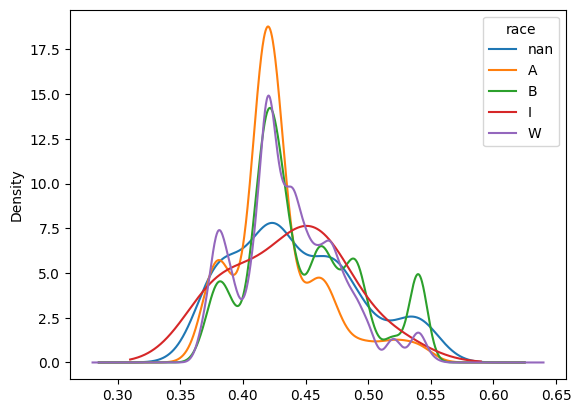

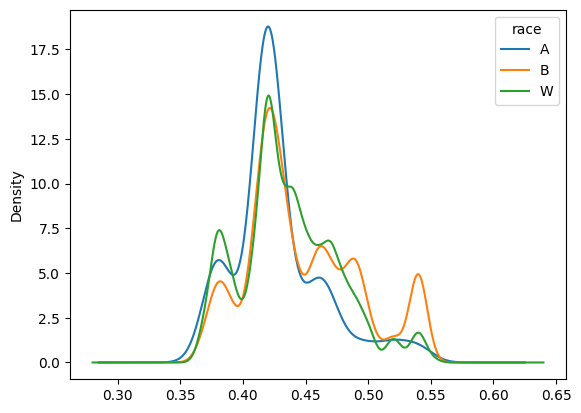

In [21]:
group_by = 'race'
var = 'gini'
df_wide = df.pivot(columns=group_by,values=var)
df_wide.plot.density()

df_wide.loc[:,['A','B','W']].plot.density() # Focus on Asian, Black, White to clean the plot up

<Axes: ylabel='Density'>

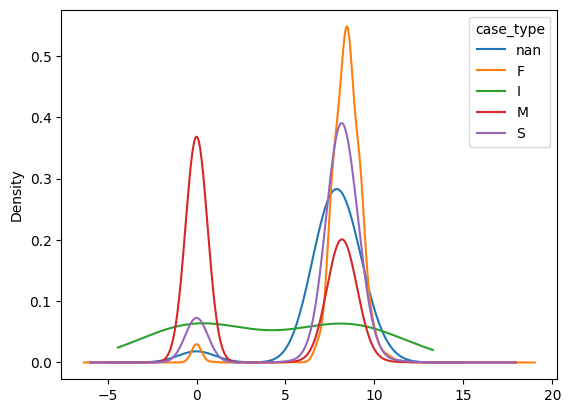

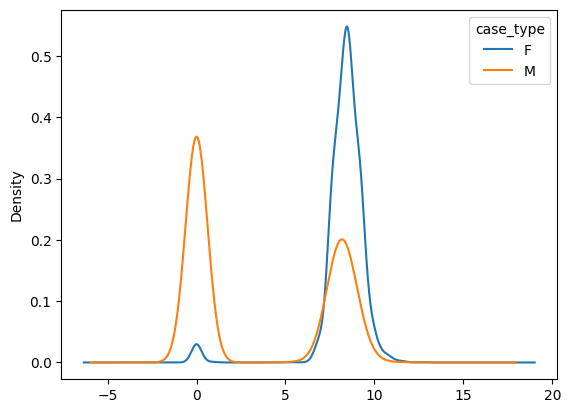

In [22]:
group_by = 'case_type'
var = 'bond_arcsinh'
df_wide = df.pivot(columns=group_by,values=var)
df_wide.plot.density()

df_wide.loc[:,['F','M']].plot.density() # Focus on misdemeanor and felony

<Axes: ylabel='Density'>

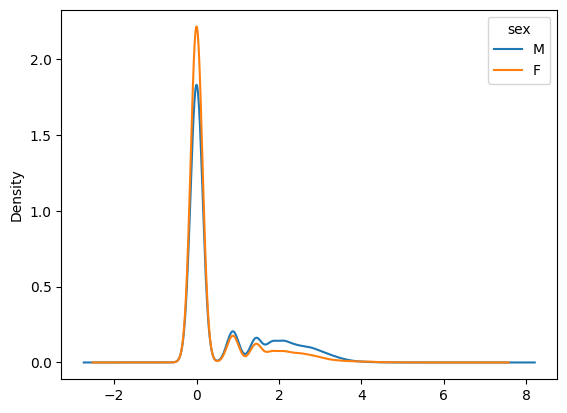

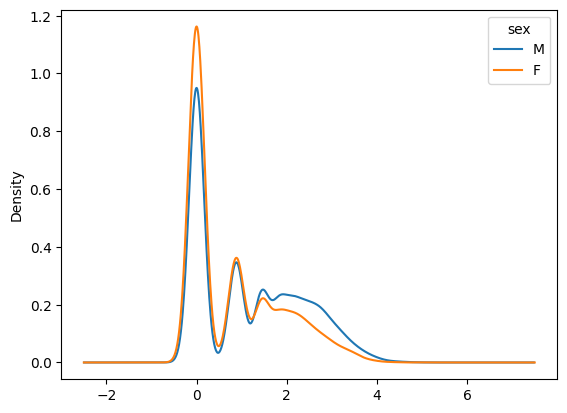

In [23]:
df['prior_F_arcsinh'] = np.arcsinh(df['prior_F'])
group_by = 'sex'
var = 'prior_F_arcsinh'
df_wide = df.pivot(columns=group_by,values=var)
df_wide.head()
df_wide.loc[:,['M','F']].plot.density()

df['prior_M_arcsinh'] = np.arcsinh(df['prior_M'])
group_by = 'sex'
var = 'prior_M_arcsinh'
df_wide = df.pivot(columns=group_by,values=var)
df_wide.head()
df_wide.loc[:,['M','F']].plot.density()

## Grouped Boxplots
- Grouping for boxplots is even easier: `df.boxplot(column = var, by = group_by)`

<Axes: title={'center': 'bond_arcsinh'}, xlabel='race'>

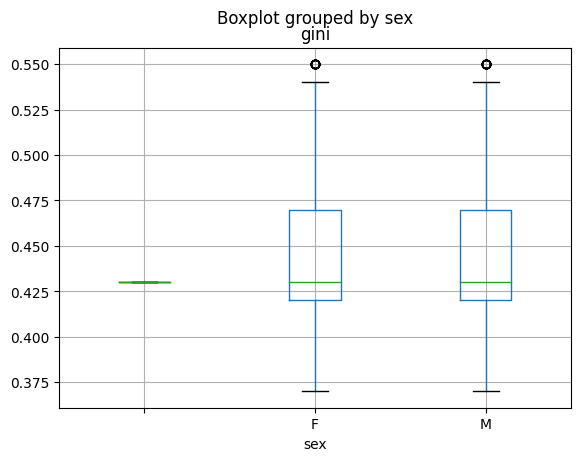

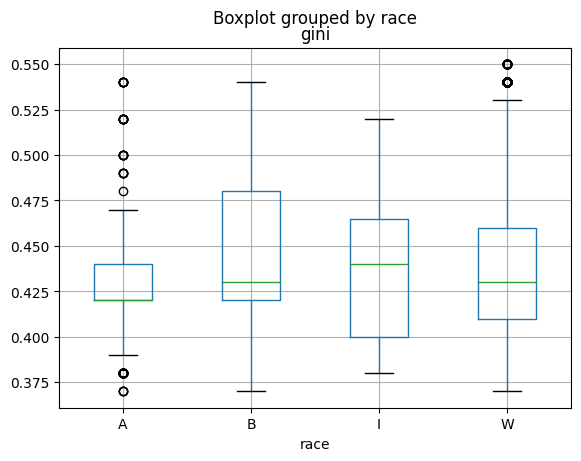

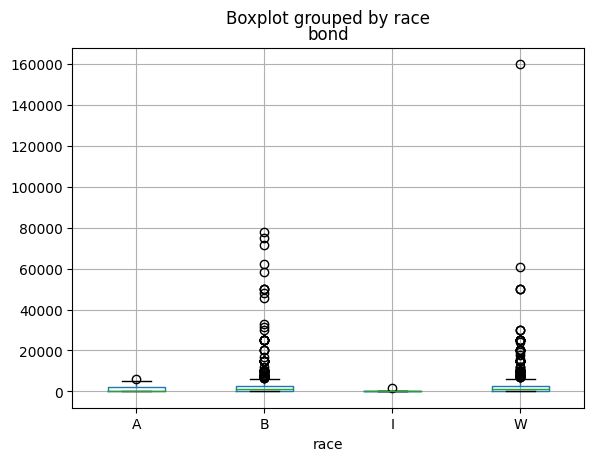

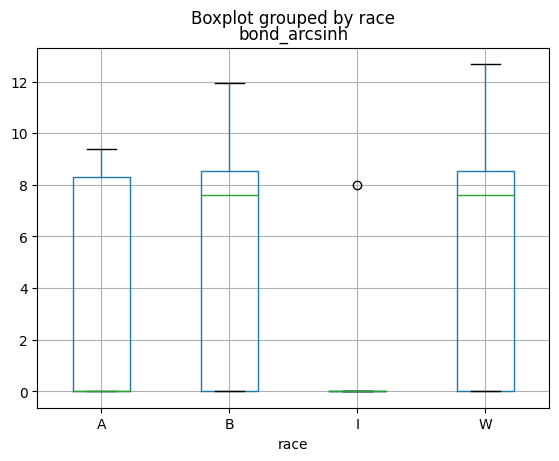

In [24]:
df.boxplot(column = 'gini',by = 'sex')
df.boxplot(column = 'gini',by = 'race')
df.boxplot(column = 'bond',by = 'race')
df.boxplot(column = 'bond_arcsinh',by = 'race')

## Grouped Descriptions
- We can group our calculations like `.describe()` in a similar way to huing or grouping:
    1. Use `df.loc[:,[group,var]]` to get the subset of the dataframe you want to analyze
    2. Then `.groupby(group).describe()` to apply `.describe()` to `var` for each `group`
- Like the grouped kernel densities, this can be a really useful way of adding context to numbers

In [25]:
var = 'bond'
group = 'case_type'
df.loc[:,[group,var]].groupby(group).describe()

bond                                                         \
             count         mean          std  min     25%     50%     75%   
case_type                                                                   
F           3040.0  3158.421711  4448.766214  0.0  1500.0  2500.0  3525.0   
I              6.0  1250.000000  1508.310313  0.0     0.0   750.0  2250.0   
M          12458.0   972.329363  2089.762114  0.0     0.0     0.0  1500.0   
S           1387.0  2161.847722  3548.012111  0.0  1000.0  1500.0  2500.0   

                      
                 max  
case_type             
F          160000.00  
I            3500.00  
M           78000.00  
S           74962.12

In [26]:
var = 'bond'
group = 'is_poor'
df.loc[:,[group,var]].groupby(group).describe()

bond                                                        \
          count         mean          std  min    25%     50%     75%   
is_poor                                                                 
0.0      9450.0  1035.299351  2255.361676  0.0    0.0     0.0  1500.0   
1.0      6632.0  1999.594260  2828.266454  0.0  500.0  1500.0  2500.0   

                   
              max  
is_poor            
0.0      74962.12  
1.0      61000.00

In [27]:
# You can .groupby multiple variables at once:
df.loc[:,['is_poor','case_type','bond']].groupby(['is_poor','case_type']).describe()

bond                                                 \
                    count         mean          std  min     25%     50%   
is_poor case_type                                                          
0.0     F          1015.0  3270.444335  3727.062229  0.0  1500.0  2500.0   
        I             3.0   833.333333  1443.375673  0.0     0.0     0.0   
        M          7883.0   679.544050  1611.456941  0.0     0.0     0.0   
        S           539.0  2027.332319  3581.322416  0.0  1000.0  1500.0   
1.0     F          1940.0  3028.917526  3301.773144  0.0  1500.0  2500.0   
        I             3.0  1666.666667  1755.942292  0.0   750.0  1500.0   
        M          3948.0  1428.168303  2153.318028  0.0     0.0  1000.0   
        S           733.0  2357.845389  3723.688027  0.0  1000.0  1500.0   

                                     
                      75%       max  
is_poor case_type                    
0.0     F          4000.0  50000.00  
        I          1250.0   2500.00  
        M          1000.0  62195.75  
        S          2500.0  74962.12  
1.0     F          3500.0  50000.00  
        I          2500.0   3500.00  
        M          2000.0  58529.22  
        S          2500.0  61000.00

## Exercise (Grouping)
- For the `sentence` and `sentence_arcsinh` variables, create grouped kernel density, boxplot, and descriptive statistics for a categorical variable in the data (e.g. `case_type`, `sex`, `race`)

## Conclusion
- These graphs are not very aesthetically pleasing -- you wouldn't put them in a publication or on your web page, probably
- But they are very quick to make, and it all happens inside Pandas, instead of moving on to other packages
- You'll find that if you want pretty plots, you need a complex Application Programming Interface (API), and the more complex the API, the more specialized the skills become
- MatPlotLib and Seaborn provide very nice plots (and ggplot2), but ask you to train your mind to think more specifically on their terms
- Now is probably a good time to start thinking about the first project